Fractals are the continous and never ending patterns that can be seen in the nature. But its quite different than the classical geometry in the sense of construction. Fractal shapes can be seen in many things in our nature where the shapes are repeating in itself with the same representation one popular example is fern leaf.

## fern leaf here
![]()

There are many other examples of fractal shapes in our world like the small bubbles of clouds, the ripple of water, ripple in pond after throwing stone, tree barks, even our own neural system and so on. Those are all complex form of fractals but lets start with simple one.



## Middle Third Cantor
While writing this blog, I have been reading a book `FRACTAL GEOMETRY Mathematical Foundations and Applications` and hence will start with some of fractals stated there.

|![](middlec.png)|
|:--:|
|FRACTAL GEOMETRY Mathematical Foundations and Applications: Page XVIII|

The simple way to create above fractal is:
1. Start by a straight line.
2. Divide the line in 3 equal parts and remove the middle part. Now there will be two distinct part.
3. Those two distinct parts will be 1/3 of the original line.
4. In those two parts too:
    a. Divide the line in 3 equal parts and remove the middle part. Each chunk line will be 1/9 th of the original line.
5. Repeat step 4 until satisfied.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Sectional Formula
Sectional formula is a simplest way to calculate the coordinates of a staight line which divides the line into (m+n) segments. If a line is from `(x1, y1) to (x2, y2)`, then to find the coordinates that divides the line into 3 equal parts, we will choose value of m and n to be 1 and 2 respectively. Then,

$$
x3 = \frac{x1 * n + x2*m}{m+n} \\\
y3 = \frac{y1 * n + y2*m}{m+n} \\\
$$

Then for the 3rd point.

$$
x4 = \frac{x1 * m + x2*n}{m+n} \\\
y4 = \frac{y1 * m + y2*n}{m+n}
$$

To divide any line into 3 different segments, we need to cut it from two places. So finding two points between a line will do the job. The sectional formula is often used to find the segment of lines with propertion to the original line.

In above formula, the denumerator, `(m+n)` represents the number of segments and in the numerator, multiplication of n and m with x1 and x2 interchangebly gives the coordinates of x in proportion of n:m and m:n respectively.


![](sectional.png)


In [34]:
def sectional_formula(x, y,m=1, n=2):
    x1 = x[0]
    x2 = x[1]
    y1 = y[0]
    y2 = y[1]
    
    #apply sectional formula
    x3 = (x1 * n + x2 * m) / (m + n)
    y3 = (y1 * n + y2 * m) / (m + n)
    x4 = (x1 * m + x2 * n) / (m + n)
    y4 = (y1 * m + y2 * n) / (m + n)
    
    return (x1, y1), (x3, y3), (x4, y4), (x2, y2)

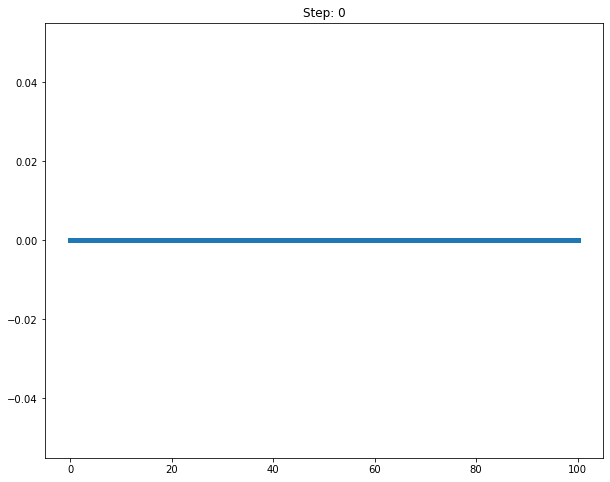

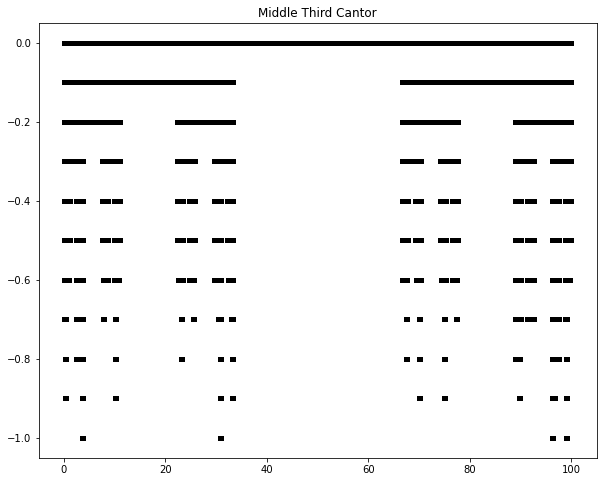

In [57]:
def middle_cantor(line=[(0,0), (100,0)], steps=10,linewidth=5, show_all=False):
    line=np.array(line)
    segments=[line]
    
    fig=plt.figure(figsize=(10,8))
    plt.plot(line[:,0], line[:,1], linewidth=linewidth)
    plt.title("Step: 0")
    plt.show()
    
    steps_data = [segments]
    
    for s in range(steps):
        new_segments = []
        for ss in range(len(segments)):
            res = sectional_formula(segments[ss][:,0], segments[ss][:,1])
            new_segments.append((res[0], res[1]))
            new_segments.append((res[2], res[3]))
        
        
        segments=np.array(new_segments)
        steps_data.append(segments)
        
        if show_all:
            fig=plt.figure(figsize=(10,8))
            for seg in segments:
                plt.plot(seg[:,0], seg[:,1], linewidth=linewidth)
            plt.title(f"Step: {s+1}")
            plt.show()
    
    fig=plt.figure(figsize=(10,8))
    for i,s in enumerate(steps_data):
        for seg in s:
            plt.plot(seg[:,0], seg[:,1]-0.1*i, linewidth=linewidth, color="black")
    plt.title(f"Middle Third Cantor")
    plt.show()
        
middle_cantor()

## Von Koch Curve
Von Koch Curve is another kind of Fractal shape which can be created by following steps:
1. Start with a straight line.
2. Divide it into 3 equal parts.
3. Form the equalateral triangle in the middle part and remove the base.
4. Consider each segments as a straight line and repeat above 2 steps.

|![](intro.png)|
|:--:|
|FRACTAL GEOMETRY Mathematical Foundations and Applications: Page XIX|


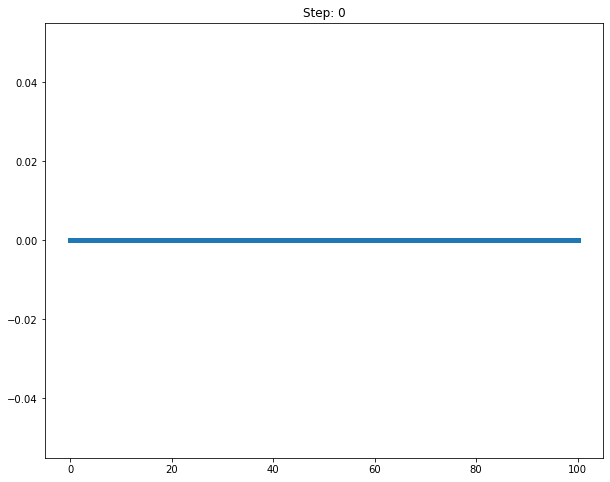

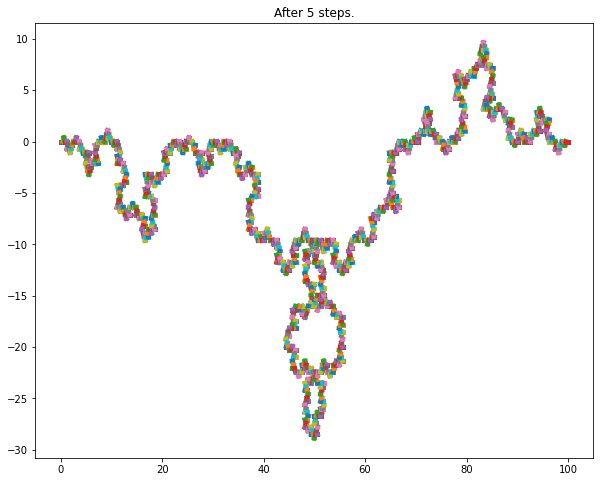

In [67]:
def von_koch(line=[(0,0), (100,0)], steps=5,linewidth=5, show_all=False, random=True):
    line=np.array(line)
    segments=[line]
    
    fig=plt.figure(figsize=(10,8))
    plt.plot(line[:,0], line[:,1], linewidth=linewidth)
    plt.title("Step: 0")
    plt.show()
    
    steps_data = [segments]
    
    for st in range(steps):
        new_segments = []
        for ss in range(len(segments)):
            res = sectional_formula(segments[ss][:,0], segments[ss][:,1])
            (x1, y1) = res[0]
            (x3, y3) = res[1]
            (x4, y4) = res[2]
            (x2, y2) = res[3]
            
            if((x4 - x3) != 0):
                #find the point that makes equilateral triangle from x3, y3 and x4, y4
                m1 = (y4 - y3) / (x4 - x3)
                m2 = (m1 - 3 ** 0.5) / (1 + 3**0.5 * m1)
                m3 = (m1 + 3 ** 0.5) / (1 - 3 ** 0.50 * m1)
                
                if(int(np.random.random(1) * 1000)%2 == 0):
                    t = m2
                    m2 = m3
                    m3 = t
            
                xT = ((y3 - y4 + m2 * x4 - m3 * x3)/ (m2 - m3))
                yT = m2 * (xT - x4) + y4
                
                new_segments.append(((x1,y1),(x3,y3)))
                new_segments.append(((x3,y3),(xT,yT)))
                new_segments.append(((xT,yT),(x4,y4)))
                new_segments.append(((x4,y4),(x2,y2)))
                
        segments=np.array(new_segments)
        steps_data.append(segments)
        
        if show_all:
            fig=plt.figure(figsize=(10,8))
            for seg in segments:
                plt.plot(seg[:,0], seg[:,1], linewidth=linewidth)
            plt.title(f"Step: {st+1}")
            plt.show()
    fig=plt.figure(figsize=(10,8))
    for seg in segments:
        plt.plot(seg[:,0], seg[:,1], linewidth=linewidth)
    plt.title(f"After {steps} steps.")
    plt.show()
    
            
    
von_koch()

### Explanation of Code
* Prepare a list with (x1,y1) (x2,y2) in it.
* Plot it as a initial version.
* Loop through number of loops.
    * Prepare an empty list to collect new segments.
    * Loop through current segments.
        * Calculate the coordinates of segments using sectional formula.
        * Calculate the middle point in the center segment which makes the equalaterial triangle.
        * That point can be in positive or negative direction from the base line and we could tune that using randomness.
        * Put all the segment points in the list in order from left to right.
* At last, plot them.

In the code block below:
```python
            if((x4 - x3) != 0):
                #find the point that makes equilateral triangle from x3, y3 and x4, y4
                m1 = (y4 - y3) / (x4 - x3)
                m2 = (m1 - 3 ** 0.5) / (1 + 3**0.5 * m1)
                m3 = (m1 + 3 ** 0.5) / (1 - 3 ** 0.50 * m1)
                
                if(int(np.random.random(1) * 1000)%2 == 0):
                    t = m2
                    m2 = m3
                    m3 = t
            
                xT = ((y3 - y4 + m2 * x4 - m3 * x3)/ (m2 - m3))
                yT = m2 * (xT - x4) + y4
```

* Find the slope of the base segment by doing `(y4 - y3) / (x4 - x3)`.
* Find the slope of the two lines that form up the equalaterial triangle with the base line. Since the equalaterial triangle will have angle of 60 degrees, we could use that to find the slope of each additional lines using the formula:

$$
tan(\theta) = \frac{m1-m2}{1+m1*m2}
$$

* Solving above equation for the unknowm m2 (assuming that the slope of base line is m1).
* Perform same solve for the another line to find the slope of another line.
* Then to find the points where these two lines meets we should solve two equations of two lines whose slope we just calculated. It could be either upwards or downards based on the random value we choose.
* Finally we will have xt and yT.

## Sierpinsky Gasket
Sierpinsky Gasket is another form of Fractals and its possibly the simplest of all.
* Start with 3 points of the triangle.
* Join the mid points of the triangle to form a new triangle inside a triangle. That triangle will have half the area of large one.
* Then having a new triangle inside a triangle by joining mid points will create 3 new triangles. Repeat above step for all triangles.

A Python code of modified version of Sierpinsky Gasket can be found in my [GitHub repository]().